In [2]:
import pandas as pd
import numpy as np
import scipy

In [3]:
dsFile = pd.read_csv('data_files/ds_dump_1.csv')

In [4]:
dsFile[0:5]

,ds_clust,ds_name,ds_cap_gb,ds_free_space,ds_storagetier,ds_storagetype,ds_readiops,ds_writeiops,ds_loc,ds_time,ds_provisionedgb,ds_overprovisionedgb
0,A-Temp,MEL01-7500-01_CL1STD_78,5119.75,407.136719,STANDARD,VMFS,NaN,NaN,mel,02/02/2016 18:19:41,NaN,NaN
1,A-Temp,MEL01-7500-01_CL1STD_78,5119.75,407.137695,STANDARD,VMFS,NaN,NaN,mel,02/02/2016 17:19:33,NaN,NaN
2,A-Temp,MEL01-7500-01_CL1STD_79,5119.75,408.018555,STANDARD,VMFS,NaN,NaN,mel,02/02/2016 18:19:41,NaN,NaN
3,A-Temp,MEL01-7500-01_CL1STD_80,5119.75,418.760742,STANDARD,VMFS,NaN,NaN,mel,02/02/2016 19:19:10,NaN,NaN
4,A-Temp,MEL01-7500-01_CL1STD_81,5119.75,444.501953,STANDARD,VMFS,NaN,NaN,mel,02/02/2016 19:19:10,NaN,NaN


In [5]:
type(dsFile)

pandas.core.frame.DataFrame

In [6]:
dsFile.describe

<bound method NDFrame.describe of                  ds_clust                  ds_name  ds_cap_gb  ds_free_space  \
0                  A-Temp  MEL01-7500-01_CL1STD_78    5119.75     407.136719   
1                  A-Temp  MEL01-7500-01_CL1STD_78    5119.75     407.137695   
2                  A-Temp  MEL01-7500-01_CL1STD_79    5119.75     408.018555   
3                  A-Temp  MEL01-7500-01_CL1STD_80    5119.75     418.760742   
4                  A-Temp  MEL01-7500-01_CL1STD_81    5119.75     444.501953   
5                  A-Temp  MEL01-7500-01_CL1STD_82    5119.75     445.079102   
6                "A-Temp"  MEL01-7500-01_CL1STD_84    5119.75    3118.775391   
7                  A-Temp  MEL01-7500-01_CL1STD_85    5119.75    5118.776367   
8                  A-Temp      MEL01-7500-01_EC_91    6143.75    6142.771484   
9                  A-Temp      MEL01-7500-01_EC_92    6143.75    6142.771484   
10                 A-Temp      MEL01-7500-01_EC_92    6143.75    6142.771484   
11    

In [10]:
dsFile.shape

(47002653, 12)

In [11]:
dsFile.columns

Index(['ds_clust', 'ds_name', 'ds_cap_gb', 'ds_free_space', 'ds_storagetier',
       'ds_storagetype', 'ds_readiops', 'ds_writeiops', 'ds_loc', 'ds_time',
       'ds_provisionedgb', 'ds_overprovisionedgb'],
      dtype='object')

In [14]:
All_unique_loc = dsFile.ds_loc.unique()

In [15]:
All_unique_loc

array(['mel', 'ash02na15', 'AMS', 'HKG01AP5', 'SYDau9', 'IL1MED1',
       'ASH02na11', 'WLG01AU12', 'HLZ01AU11', 'YYZ01CA2', 'JNB01AF5',
       'JNB03AF4', 'JNB02AF4', 'ash02na14', 'HND01AP4', 'SNUna16', 'AMD',
       'snuna17', 'IL2MED1', 'EU7AMS', 'JNB01AF3', 'ash02na18', 'ASH02NA9',
       'jnb02', 'ash02alk', 'LHR03EU8', 'ash02', 'amsalk', 'melau10',
       'MELau10', 'ap3', 'CBRAC2', 'cgk02id2', 'SNUna13', 'sin02ap6',
       'sin03ap7', 'ASH02na10', 'SNUna12', 'fra', 'FRA02EU10', 'FRA03EU11',
       'ASH', 'gci', 'GRU01', 'HKG', 'ash02ell', 'acc', 'HLZ', 'NA2',
       'cbr01', 'cgk01', 'CGK', 'hnd', 'csyd01', 'JNB', 'mrcy', 'SNU',
       'NA4', 'lhr03', 'jer', 'als', 'boq', 'SYD', 'yyz01', 'ap10',
       'BRU03EU9', 'sin01ap8', 'sin01ap9', 'No Report'], dtype=object)

In [20]:
All_unique_loc.sort

<function ndarray.sort>

In [21]:
All_unique_loc

array(['AMD', 'AMS', 'ASH', 'ASH02NA9', 'ASH02na10', 'ASH02na11',
       'BRU03EU9', 'CBRAC2', 'CGK', 'EU7AMS', 'FRA02EU10', 'FRA03EU11',
       'GRU01', 'HKG', 'HKG01AP5', 'HLZ', 'HLZ01AU11', 'HND01AP4',
       'IL1MED1', 'IL2MED1', 'JNB', 'JNB01AF3', 'JNB01AF5', 'JNB02AF4',
       'JNB03AF4', 'LHR03EU8', 'MELau10', 'NA2', 'NA4', 'No Report', 'SNU',
       'SNUna12', 'SNUna13', 'SNUna16', 'SYD', 'SYDau9', 'WLG01AU12',
       'YYZ01CA2', 'acc', 'als', 'amsalk', 'ap10', 'ap3', 'ash02',
       'ash02alk', 'ash02ell', 'ash02na14', 'ash02na15', 'ash02na18',
       'boq', 'cbr01', 'cgk01', 'cgk02id2', 'csyd01', 'fra', 'gci', 'hnd',
       'jer', 'jnb02', 'lhr03', 'mel', 'melau10', 'mrcy', 'sin01ap8',
       'sin01ap9', 'sin02ap6', 'sin03ap7', 'snuna17', 'yyz01'], dtype=object)

In [22]:
sorted_dsFile = dsFile.sort(columns='ds_loc')

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [24]:
sorted_dsFile.set_index(keys='ds_loc', drop=False, inplace=True)

In [27]:
sorted_dsFile.shape

(47002653, 12)

In [32]:
sorted_dsFile.columns

Index(['ds_clust', 'ds_name', 'ds_cap_gb', 'ds_free_space', 'ds_storagetier',
       'ds_storagetype', 'ds_readiops', 'ds_writeiops', 'ds_loc', 'ds_time',
       'ds_provisionedgb', 'ds_overprovisionedgb'],
      dtype='object')

In [50]:
AMD_data.head

<bound method NDFrame.head of          ds_clust                ds_name  ds_cap_gb  ds_free_space  \
ds_loc                                                               
AMD     amdc4e01p  AMD-5700-01_CL1STD_55    5119.75    5118.776367   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.570000   
AMD     amdc4e01p       AMD_VNX-1_VM_001    5119.75     413.

In [37]:
AMD_data.shape

(1066349, 12)

In [54]:
AMD_data.sort_values(by='ds_time', inplace=True)

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
AMD_data.head

<bound method NDFrame.head of          ds_clust                 ds_name  ds_cap_gb  ds_free_space  \
ds_loc                                                                
AMD     amdc4e01p        AMD_VNX-1_VM_005    5119.75    5116.990000   
AMD     amdc4e01p        AMD_VNX-1_VM_006    5119.75    5105.720000   
AMD     amdc4e01p        AMD_VNX-1_VM_010    5119.75    5118.770000   
AMD     amdc4e01p        AMD_VNX-1_VM_002    5119.75     498.630000   
AMD     amdc4e01p        AMD_VNX-1_VM_004    5119.75     404.180000   
AMD     amdc4e01p        AMD_VNX-1_VM_013    5119.75    5118.780000   
AMD     amdc4e01p        AMD_VNX-1_VM_009    5119.75    5078.770000   
AMD     amdc4e01p        AMD_VNX-1_VM_007    5119.75     795.240000   
AMD     amdc4e01p        AMD_VNX-1_VM_011    5119.75    5118.770000   
AMD     amdc4e01p        AMD_VNX-1_VM_008    5119.75    5109.050000   
AMD     amdc4e01p        AMD_VNX-1_VM_003    5119.75     446.210000   
AMD     amdc4e01p        AMD_VNX-1_VM_012    51

In [62]:
AMD_data.ds_name.unique()

array(['AMD_VNX-1_VM_005', 'AMD_VNX-1_VM_006', 'AMD_VNX-1_VM_010',
       'AMD_VNX-1_VM_002', 'AMD_VNX-1_VM_004', 'AMD_VNX-1_VM_013',
       'AMD_VNX-1_VM_009', 'AMD_VNX-1_VM_007', 'AMD_VNX-1_VM_011',
       'AMD_VNX-1_VM_008', 'AMD_VNX-1_VM_003', 'AMD_VNX-1_VM_012',
       'AMD_VNX-1_VM_015', 'AMD_VNX-1_Template_001', 'AMD_VNX-1_VM_014',
       'AMD_VNX-1_VM_001', 'AMD_VNX-1_VM_019', 'AMD_VNX-1_VM_016',
       'AMD_VNX-1_VM_017', 'AMD_VNX-1_VM_020', 'AMD_VNX-1_VM_018',
       'AMD_VNX-1_VM_033', 'AMD_VNX-1_VM_026', 'AMD_VNX-1_VM_027',
       'AMD_VNX-1_VM_023', 'AMD_VNX-1_VM_031', 'AMD_VNX-1_VM_024',
       'AMD_VNX-1_VM_029', 'AMD_VNX-1_VM_021', 'AMD_VNX-1_VM_022',
       'AMD_VNX-1_VM_032', 'AMD_VNX-1_VM_028', 'AMD_VNX-1_VM_025',
       'AMD_VNX-1_VM_030', 'datastore1 (1)', 'datastore1',
       'datastore1 (4)', 'datastore1 (3)', 'datastore1 (2)',
       'AMD_VNX-1_VM_034', 'AMD_VNX-1_VM_035', 'AMD_5700-01_CL1STD_45',
       'AMD_5700-01_CL1STD_44', 'AMD_5700-01_CL1STD_41',
       '

In [101]:
import matplotlib.pyplot as plt

for group in AMD_data.groupby('ds_name'):
    plt.figure()
    group.plot(x='ds_time', y='ds_free_space')
    plt.show()

AttributeError: 'tuple' object has no attribute 'plot'

In [79]:
AMD_data.sort_values(['ds_name', 'ds_time'], inplace=True)

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
AMD_data.groupby(['ds_name']).size()

ds_name
AMD-5700-01_CL1STD_50     9242
AMD-5700-01_CL1STD_51     9242
AMD-5700-01_CL1STD_52     9242
AMD-5700-01_CL1STD_53     9242
AMD-5700-01_CL1STD_54     9242
AMD-5700-01_CL1STD_55     9242
AMD-5700-01_CL1STD_56     9242
AMD-5700-01_CL1STD_57     9242
AMD-5700-01_CL1STD_58     9242
AMD-5700-01_CL1STD_59     9242
AMD-5700-01_CL1STD_60     9242
AMD-5700-01_CL1STD_61     9241
AMD-5700-01_CL1STD_62     9242
AMD-5700-01_CL1STD_63     9242
AMD-5700-01_CL1STD_64     9242
AMD-5700-01_CL1STD_65     9242
AMD-5700-01_CL1STD_66     8569
AMD-5700-01_CL1STD_67     9241
AMD-5700-01_CL1STD_68     9241
AMD-5700-01_CL1STD_69     9241
AMD-5700-01_CL1STD_70     8571
AMD-5700-01_CL1STD_71     9241
AMD-5700-01_CL1STD_72     9241
AMD-5700-01_CL1STD_73     9241
AMD-5700-01_CL1STD_74     9241
AMD-5700-01_CL1STD_75     9241
AMD-5700-01_CL1STD_76     9241
AMD-5700-01_CL1STD_77     9241
AMD-5700-01_CL1STD_78     9241
AMD-5700-01_CL1STD_79     9241
                         ...  
AMD_VNX-1_VM_013         24417


In [85]:
AMD_5700_01_CL1STD_50_data = AMD_data.loc[AMD_data['ds_name'] == 'AMD-5700-01_CL1STD_50']
AMD_5700_01_CL1STD_51_data = AMD_data.loc[AMD_data['ds_name'] == 'AMD-5700-01_CL1STD_51']
AMD_VNX_1_VM_034_data = AMD_data.loc[AMD_data['ds_name'] == 'AMD_VNX-1_VM_034']
AMD_VNX_1_VM_035_data = AMD_data.loc[AMD_data['ds_name'] == 'AMD_VNX-1_VM_035']


In [110]:
AMD_VNX_1_VM_013_data = AMD_data.loc[AMD_data['ds_name'] == 'AMD_VNX-1_VM_013']

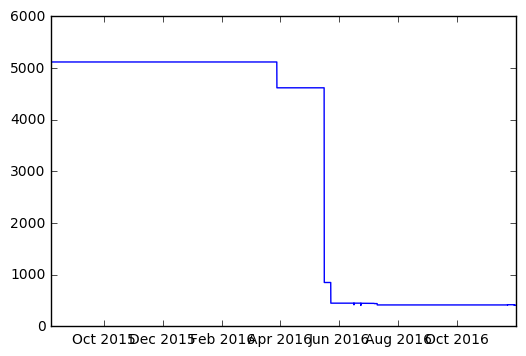

In [100]:
# AMD_5700_01_CL1STD_50_data.head
plt.figure()
plt.plot(AMD_5700_01_CL1STD_50_data['ds_time'], AMD_5700_01_CL1STD_50_data['ds_free_space'])
plt.show()

In [113]:
AMD_5700_01_CL1STD_51_data.ds_name.unique()

array(['AMD-5700-01_CL1STD_51'], dtype=object)

In [90]:
AMD_VNX_1_VM_034_data.head

<bound method NDFrame.head of          ds_clust           ds_name  ds_cap_gb  ds_free_space ds_storagetier  \
ds_loc                                                                         
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    5118.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    2618.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    2618.750000            NaN   
AMD     amdc4e01p  AMD_VNX-1_VM_034    5119.75    2618.750000            NaN   
AMD     am

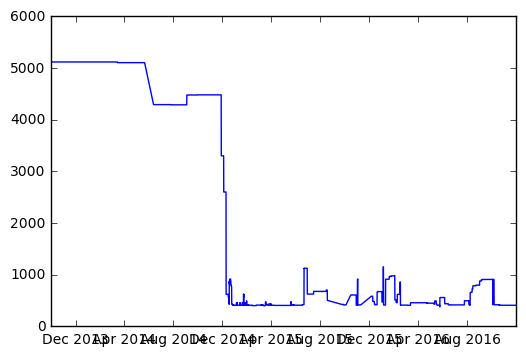

In [111]:
plt.figure()
plt.plot(AMD_VNX_1_VM_013_data['ds_time'], AMD_VNX_1_VM_013_data['ds_free_space'])
plt.show()

In [109]:
AMD_data.groupby(['ds_name'])['ds_time'].max()

ds_name
AMD-5700-01_CL1STD_50   2016-11-30 22:20:35
AMD-5700-01_CL1STD_51   2016-11-30 22:20:35
AMD-5700-01_CL1STD_52   2016-11-30 22:20:35
AMD-5700-01_CL1STD_53   2016-11-30 22:20:35
AMD-5700-01_CL1STD_54   2016-11-30 22:20:35
AMD-5700-01_CL1STD_55   2016-11-30 22:20:35
AMD-5700-01_CL1STD_56   2016-11-30 22:20:35
AMD-5700-01_CL1STD_57   2016-11-30 22:20:35
AMD-5700-01_CL1STD_58   2016-11-30 22:20:35
AMD-5700-01_CL1STD_59   2016-11-30 22:20:35
AMD-5700-01_CL1STD_60   2016-11-30 22:20:35
AMD-5700-01_CL1STD_61   2016-11-30 22:20:35
AMD-5700-01_CL1STD_62   2016-11-30 22:20:35
AMD-5700-01_CL1STD_63   2016-11-30 22:20:35
AMD-5700-01_CL1STD_64   2016-11-30 22:20:35
AMD-5700-01_CL1STD_65   2016-11-30 22:20:35
AMD-5700-01_CL1STD_66   2016-10-27 11:27:16
AMD-5700-01_CL1STD_67   2016-11-30 22:20:35
AMD-5700-01_CL1STD_68   2016-11-30 22:20:35
AMD-5700-01_CL1STD_69   2016-11-30 22:20:35
AMD-5700-01_CL1STD_70   2016-10-27 13:24:41
AMD-5700-01_CL1STD_71   2016-11-30 22:20:35
AMD-5700-01_CL1STD_72   

In [114]:
AMD_data.ds_clust.unique()

array(['amdc4e01p'], dtype=object)